# <p style="text-align: center;">Direct solver comparison in OGS</p>

## Machine: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz

## Model: ThermoRichardsMechanics (2D) 3463 nodes 10 time steps

In [1]:
from ogs6py.ogs import OGS
import numpy as np
import matplotlib.pyplot as plt
import plot_settings

In [2]:
runs = 10

In [3]:
folder= "/home/buchwalj/OGS_Solver_Comparison/data/sims"

In [4]:
solvers = ["Eigen/SparseLU","PETSc/SuperLU", "PETSc/MUMPS", "Eigen/PardisoLU"]

In [5]:
def setSolver(fileobject, solver):
    if solver == "Eigen/SparseLU":
        fileobject.replace_text("SparseLU", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.write_input()
        fileobject.run_model(path="/home/buchwalj/github/ogs/build_mkl/bin", logfile=f"{folder}/sparselu.out")
        exec_time = fileobject.exec_time
    elif solver == "Eigen/PardisoLU":
        fileobject.replace_text("PardisoLU", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.write_input()
        fileobject.run_model(path="/home/buchwalj/github/ogs/build_mkl/bin", logfile=f"{folder}/pardisolu.out")
    elif solver == "PETSc/SuperLU":
        fileobject.replace_text("-hc_mat_type aij -hc_pc_type lu -hc_pc_factor_mat_solver_type superlu_dist -hc_ksp_view", xpath="./linear_solvers/linear_solver/petsc/parameters")
        fileobject.write_input()
        fileobject.run_model(path="/home/buchwalj/github/ogs/build_mkl_petsc/bin", logfile=f"{folder}/superlu.out")
    elif solver == "PETSc/MUMPS":
        fileobject.replace_text("-hc_mat_type aij -hc_pc_type lu -hc_pc_factor_mat_solver_type mumps -hc_ksp_view", xpath="./linear_solvers/linear_solver/petsc/parameters")
        fileobject.write_input()
        fileobject.run_model(path="/home/buchwalj/github/ogs/build_mkl_petsc/bin", logfile=f"{folder}/mumps.out")
    exec_time = fileobject.exec_time
    return exec_time

In [6]:
exec_time = {}
for solver in solvers:
    exec_time[solver] = []
    for i in range(runs):
        solver_ = solver.split("/")[-1]
        m = OGS(INPUT_FILE=f"{folder}/Decovalex-0.prj", PROJECT_FILE=f"{folder}/{solver_}.prj", MKL=True, OMP_NUM_THREADS=4)
        exec_time[solver].append(setSolver(m, solver))

OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 47.84388828277588 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 48.25065326690674 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 48.37699270248413 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 49.804137229919434 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 48.68164801597595 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 50.1311776638031 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 48.712085008621216 s
OGS finished with project file /home/buchwalj/OGS_Solver_Comparison/data/sims/SparseLU.prj.
Execution took 49.

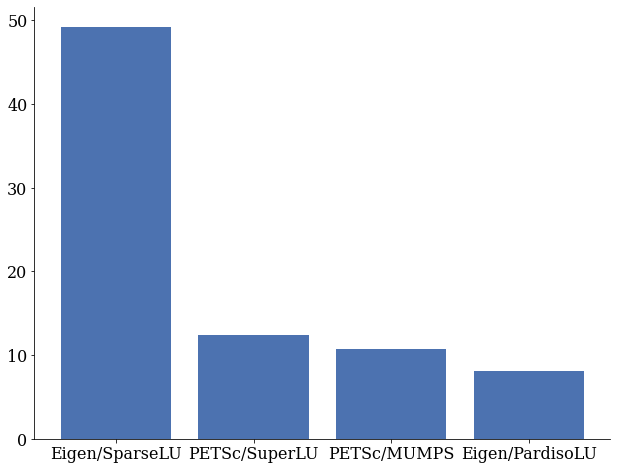

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(solvers,[np.sum(exec_time[solver])/runs for solver in solvers])
plt.show()

In [8]:
[np.sum(exec_time[solver])/runs for solver in solvers]

[49.17840237617493, 12.35424039363861, 10.77198622226715, 8.060810017585755]